In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('airlines_flights_data.csv')
df

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [3]:
df.drop(['index'], axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [5]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


---

In [6]:
df[df.duration == max(df.duration)][['airline', 'flight', 'source_city', 'destination_city', 'duration']]

,airline,flight,source_city,destination_city,duration
193889,Air_India,AI-672,Chennai,Bangalore,49.83
194359,Air_India,AI-672,Chennai,Bangalore,49.83


In [7]:
dat = df[['duration', 'days_left', 'price']].corr()
dat

,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


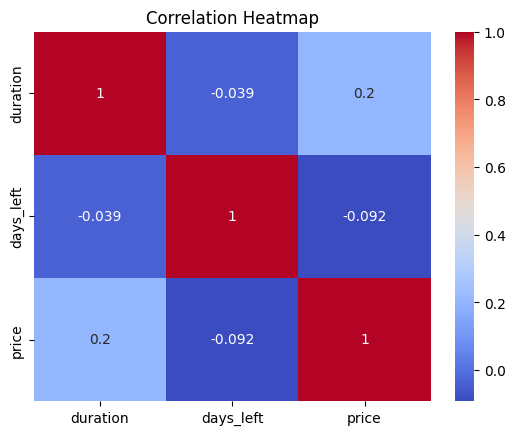

In [8]:
sns.heatmap(dat, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [9]:
df['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

---

In [10]:
df['airline'].value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [11]:
df.groupby('airline').count().sort_values(by='flight', ascending=False)

,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
airline,,,,,,,,,,
Vistara,127859,127859,127859,127859,127859,127859,127859,127859,127859,127859
Air_India,80892,80892,80892,80892,80892,80892,80892,80892,80892,80892
Indigo,43120,43120,43120,43120,43120,43120,43120,43120,43120,43120
GO_FIRST,23173,23173,23173,23173,23173,23173,23173,23173,23173,23173
AirAsia,16098,16098,16098,16098,16098,16098,16098,16098,16098,16098
SpiceJet,9011,9011,9011,9011,9011,9011,9011,9011,9011,9011


In [12]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [13]:
df['departure_time'].value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [14]:
df['arrival_time'].value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

<BarContainer object of 476 artists>

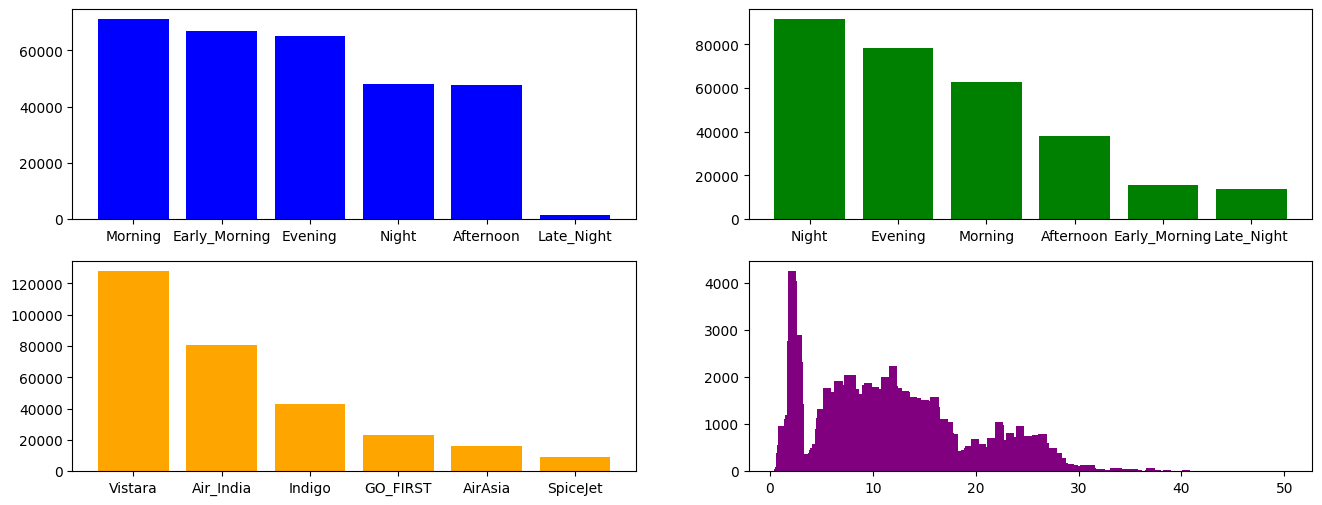

In [15]:
plt.figure(figsize=(16, 6))

plt.subplot(2, 2, 1)

plt.bar(x=df['departure_time'].value_counts().index, height=df['departure_time'].value_counts().values, color='blue')

plt.subplot(2, 2, 2)

plt.bar(x=df['arrival_time'].value_counts().index, height=df['arrival_time'].value_counts().values, color='green')

plt.subplot(2, 2, 3)

plt.bar(x=df['airline'].value_counts().index, height=df['airline'].value_counts().values, color='orange')

plt.subplot(2, 2, 4)

plt.bar(x=df['duration'].value_counts().index, height=df['duration'].value_counts().values, color='purple')


In [16]:
a = df.groupby('arrival_time')['price'].mean()
a = pd.DataFrame(a).reset_index()
a

,arrival_time,price
0,Afternoon,18494.598993
1,Early_Morning,14993.139521
2,Evening,23044.371615
3,Late_Night,11284.906078
4,Morning,22231.076098
5,Night,21586.758341


In [17]:
b = df.groupby('departure_time')['price'].mean()
b = pd.DataFrame(b).reset_index()
b

,departure_time,price
0,Afternoon,18179.203331
1,Early_Morning,20370.676718
2,Evening,21232.361894
3,Late_Night,9295.299387
4,Morning,21630.760254
5,Night,23062.146808


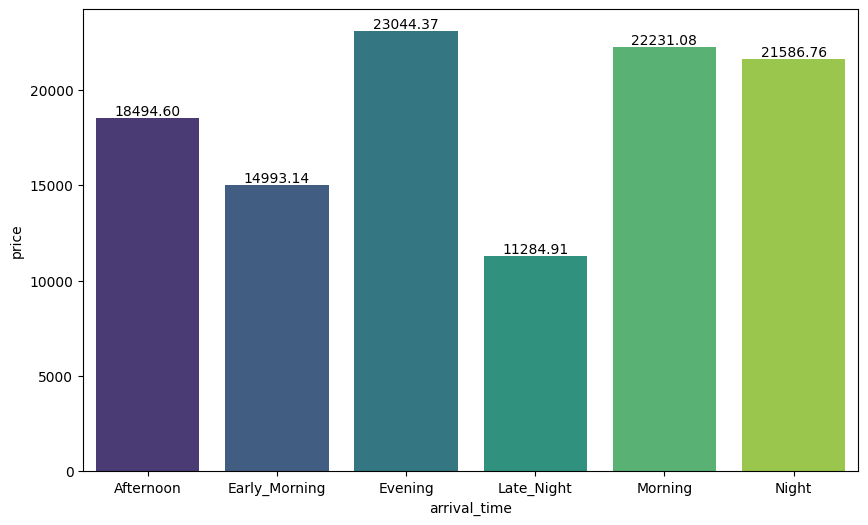

In [18]:
plt.figure(figsize=(10, 6))
y = sns.barplot(x=a.arrival_time, y=a.price, data=df, palette='viridis', estimator=np.mean, errorbar=None)
for i in range(len(y.containers)):
    y.bar_label(y.containers[i], fmt='%.2f', label_type='edge', fontsize=10, color='black')
plt.show()

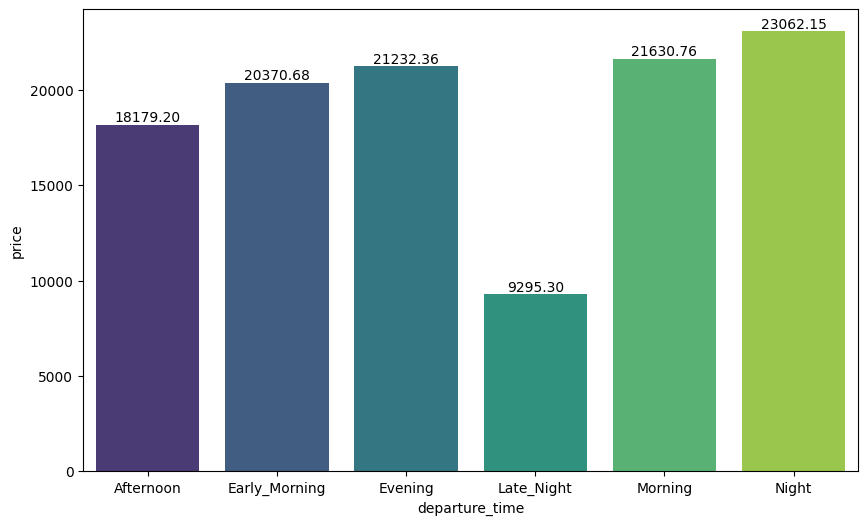

In [19]:
plt.figure(figsize=(10, 6))
x = sns.barplot(x=b.departure_time, y=b.price, data=df, palette='viridis', orient='v')
for i in range(len(x.containers)):
    x.bar_label(x.containers[i], fmt='%.2f', label_type='edge', fontsize=10, color='black')
plt.show()

<Figure size 1500x600 with 0 Axes>

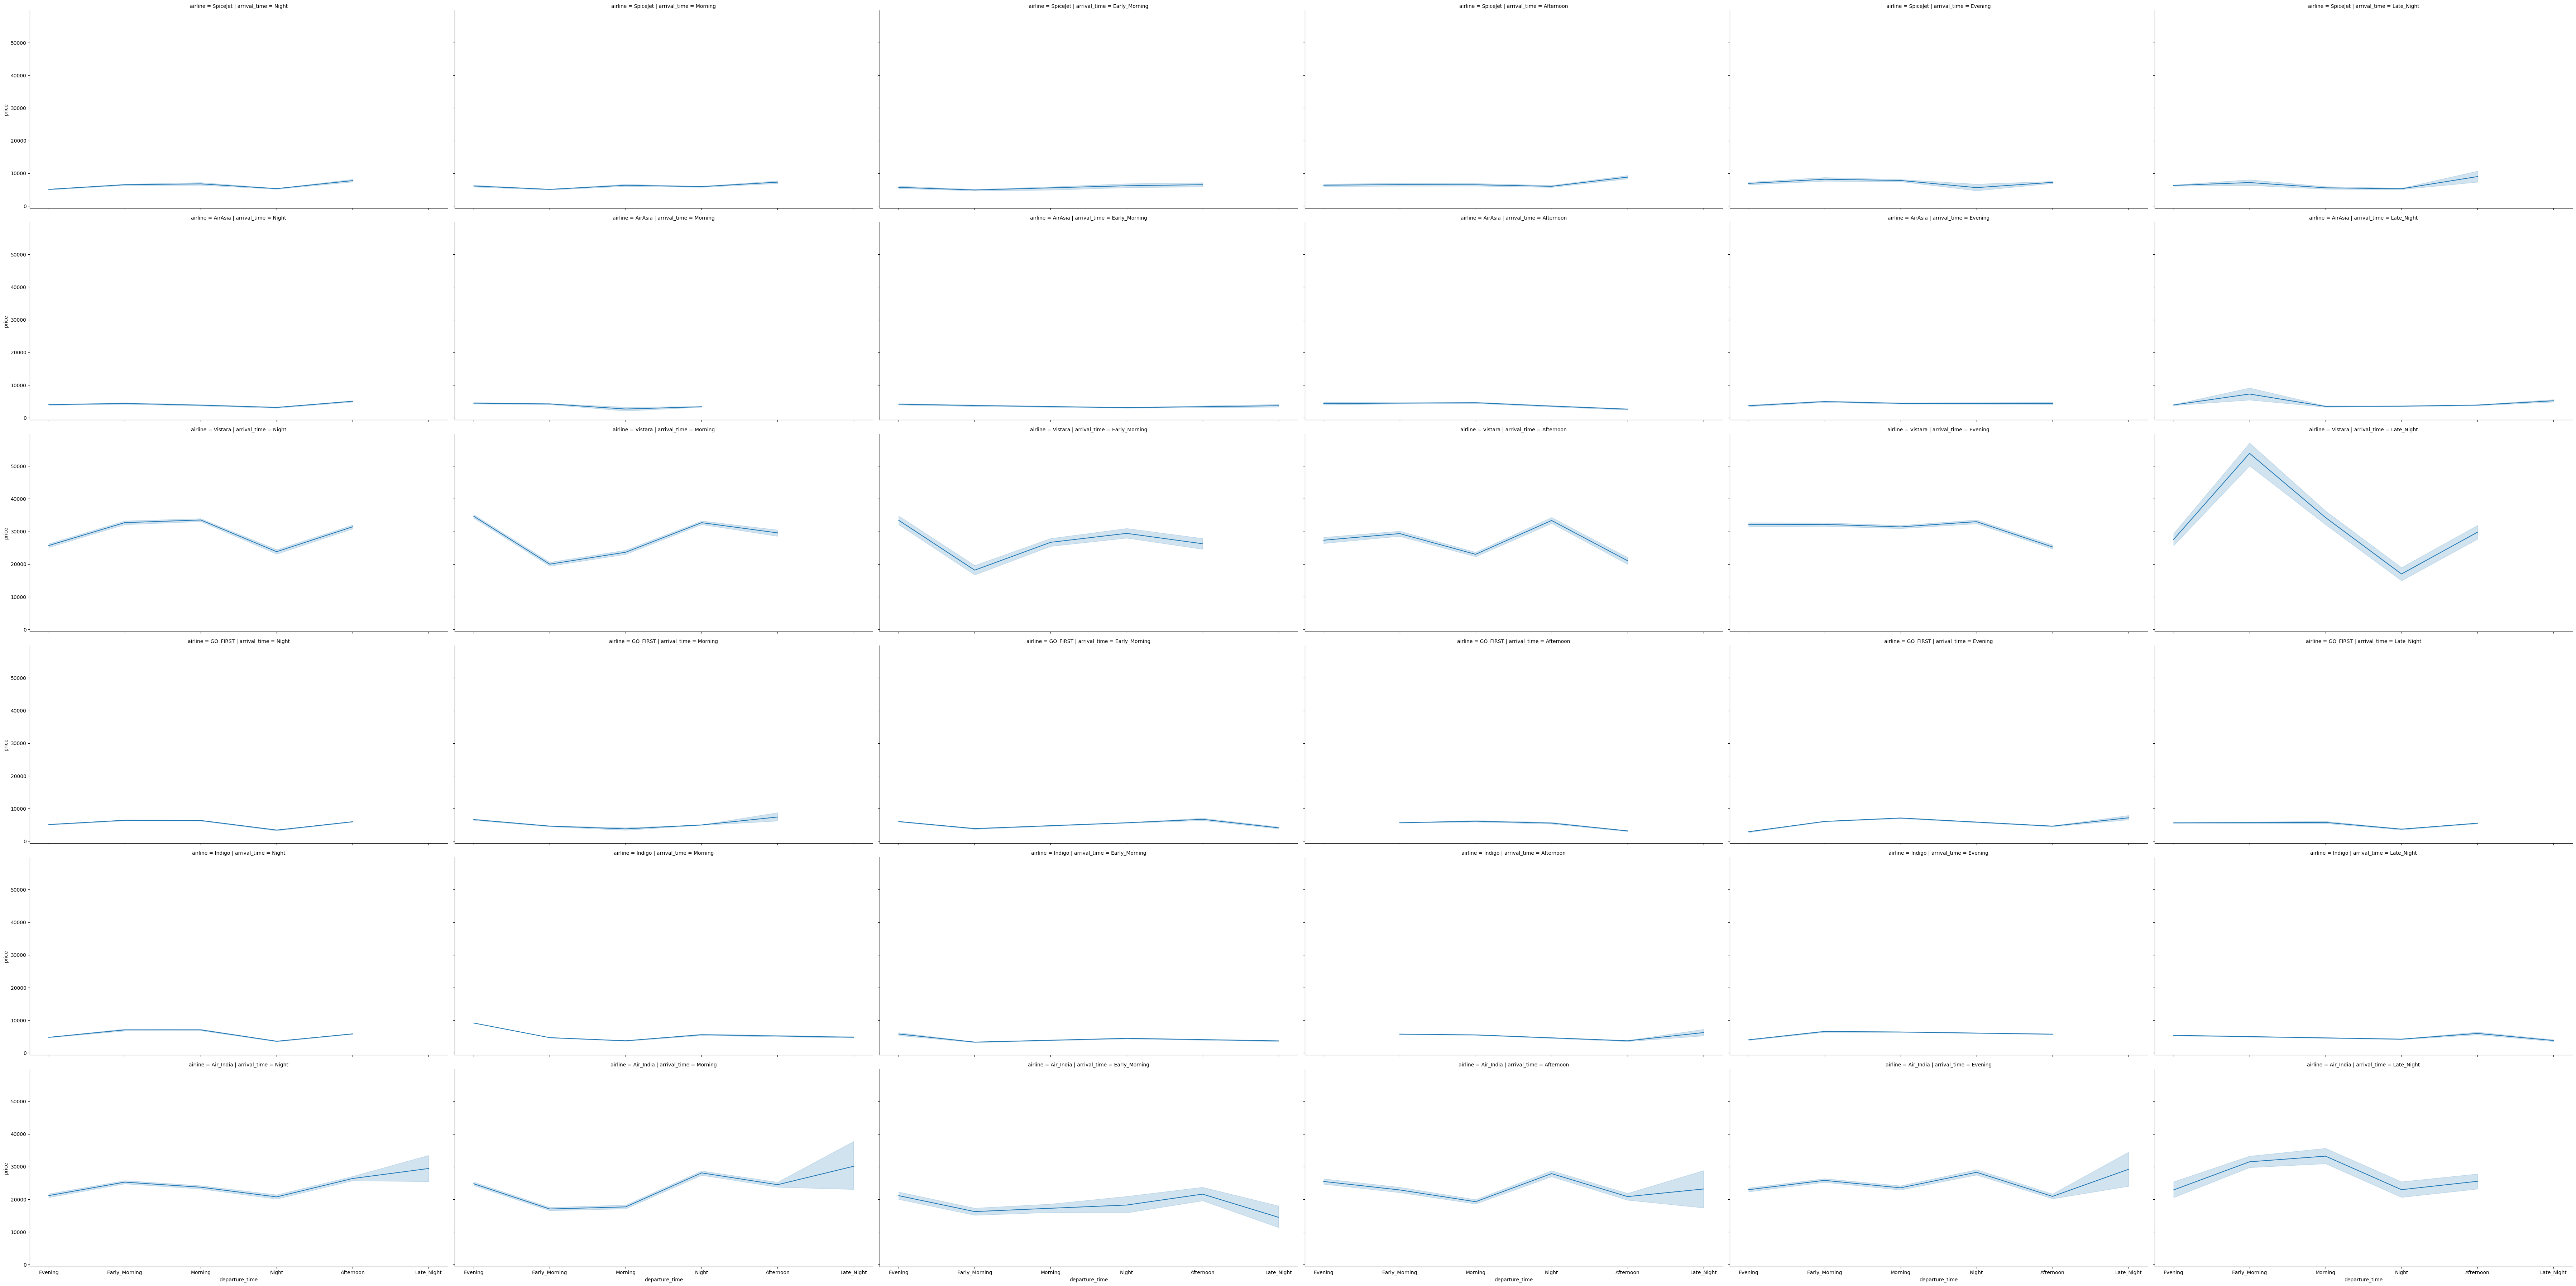

In [20]:
plt.figure(figsize=(15, 6))
sns.relplot(x='departure_time', y='price', data=df, kind='line', palette='viridis', col='arrival_time', row='airline', height=6, aspect=2)

---

Ques: How does price change just before 1 or 2 days to departure?

In [21]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [22]:
c = df[df.days_left <= 2].groupby('airline')['price'].mean().sort_values(ascending=False)
c = pd.DataFrame(c).reset_index()
c.columns = ['airline', 'price_<2_days']
c

,airline,price_<2_days
0,Vistara,36123.469965
1,Air_India,30408.463500
2,Indigo,12833.123062
3,SpiceJet,11911.313901
4,GO_FIRST,11841.737557
5,AirAsia,9956.469484


In [23]:
d = df.groupby('airline')['price'].mean().sort_values(ascending=False)
d = pd.DataFrame(d).reset_index()
d

,airline,price
0,Vistara,30396.536302
1,Air_India,23507.019112
2,SpiceJet,6179.278881
3,GO_FIRST,5652.007595
4,Indigo,5324.216303
5,AirAsia,4091.072742


In [24]:
e = d.join(c.set_index('airline'), on='airline')
e['price_diff'] = e['price_<2_days'] - e['price']
e

,airline,price,price_<2_days,price_diff
0,Vistara,30396.536302,36123.469965,5726.933663
1,Air_India,23507.019112,30408.463500,6901.444388
2,SpiceJet,6179.278881,11911.313901,5732.035020
3,GO_FIRST,5652.007595,11841.737557,6189.729962
4,Indigo,5324.216303,12833.123062,7508.906759
5,AirAsia,4091.072742,9956.469484,5865.396742


In [25]:
e.drop(columns=['price_diff'], inplace=True)

In [26]:
e

,airline,price,price_<2_days
0,Vistara,30396.536302,36123.469965
1,Air_India,23507.019112,30408.463500
2,SpiceJet,6179.278881,11911.313901
3,GO_FIRST,5652.007595,11841.737557
4,Indigo,5324.216303,12833.123062
5,AirAsia,4091.072742,9956.469484


In [27]:
#melt df
e_melted = e.melt(id_vars='airline', value_vars=['price_<2_days', 'price'], var_name='price_type', value_name='value')
e_melted.columns = ['airline', 'price_type', 'price']
e_melted

,airline,price_type,price
0,Vistara,price_<2_days,36123.469965
1,Air_India,price_<2_days,30408.463500
2,SpiceJet,price_<2_days,11911.313901
3,GO_FIRST,price_<2_days,11841.737557
4,Indigo,price_<2_days,12833.123062
5,AirAsia,price_<2_days,9956.469484
6,Vistara,price,30396.536302
7,Air_India,price,23507.019112
8,SpiceJet,price,6179.278881
9,GO_FIRST,price,5652.007595


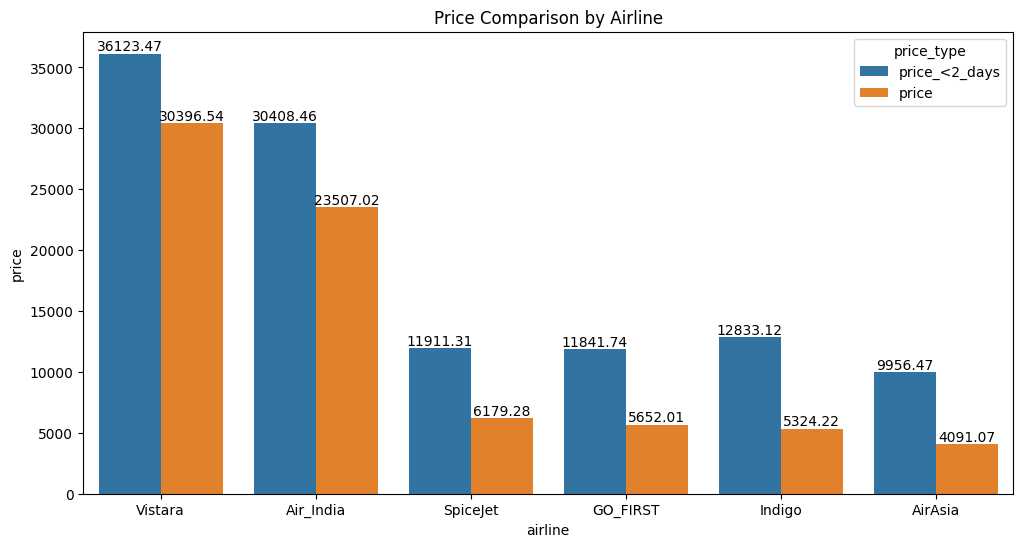

In [28]:
plt.figure(figsize=(12, 6))
f = sns.barplot(data=e_melted, x='airline', y='price', hue='price_type')
for i in range(len(f.containers)):
    f.bar_label(f.containers[i], fmt='%.2f', label_type='edge', fontsize=10, color='black')
plt.title('Price Comparison by Airline')
plt.show()

In [29]:
df.groupby('days_left')['price'].mean()

days_left
1     21591.867151
2     30211.299801
3     28976.083569
4     25730.905653
5     26679.773368
6     24856.493902
7     25588.367351
8     24895.883995
9     25726.246072
10    25572.819134
11    22990.656070
12    22505.803322
13    22498.885384
14    22678.002363
15    21952.540852
16    20503.546237
17    20386.353949
18    19987.445168
19    19507.677375
20    19699.983390
21    19430.494058
22    19590.667385
23    19840.913451
24    19803.908896
25    19571.641791
26    19238.290278
27    19950.866195
28    19534.986047
29    19744.653119
30    19567.580834
31    19392.706612
32    19258.135308
33    19306.271739
34    19562.008266
35    19255.652996
36    19517.688444
37    19506.306516
38    19734.912316
39    19262.095556
40    19144.972439
41    19347.440460
42    19154.261659
43    19340.528894
44    19049.080174
45    19199.876307
46    19305.351623
47    18553.272038
48    18998.126851
49    18992.971888
Name: price, dtype: float64

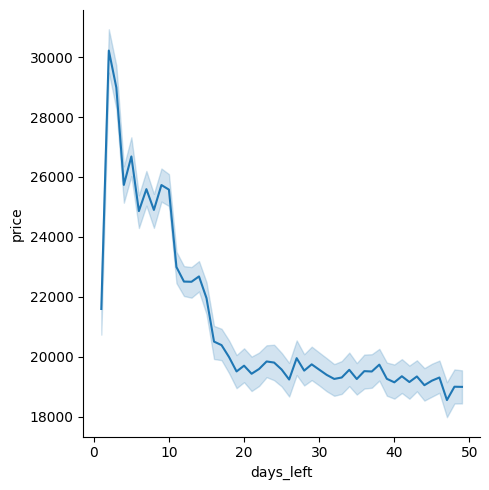

In [30]:
sns.relplot(data=df, x='days_left', y='price', kind='line')
plt.show()

---

Ques: What will be avg price of Vistara airline for a flight from Delhi to Hyderabad in Business class?

In [31]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [32]:
df[df.source_city == 'Delhi'][df.destination_city == 'Hyderabad'][df.airline == 'Vistara'][df['class'] == "Business"].price.mean()

np.float64(47939.840361445786)

In [35]:
g = df[df.source_city == 'Delhi'][df.destination_city == 'Hyderabad'].groupby(['class', 'airline'])['price'].mean().sort_values(ascending=False)
g = pd.DataFrame(g).reset_index()
g.index = g.index + 1
g

,class,airline,price
1,Business,Vistara,47939.840361
2,Business,Air_India,39139.171113
3,Economy,Vistara,6772.028246
4,Economy,Air_India,6470.287305
5,Economy,SpiceJet,5831.111842
6,Economy,GO_FIRST,5394.221328
7,Economy,Indigo,4820.533784
8,Economy,AirAsia,4733.344780
